In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install dabl
import dabl


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [4]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [5]:
df = pd.read_csv(r"C:\Users\sneha\Downloads\tarifftruck1 (3).csv")

In [6]:
df.shape


(1289, 11)

In [7]:
df.columns


Index(['year', 'road', 'seasonalimpact', 'demand', 'wttons', 'labour', 'toll',
       'distance', 'fuelcost', 'miscellaneous', 'tariff'],
      dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1289 non-null   int64  
 1   road            907 non-null    object 
 2   seasonalimpact  1243 non-null   object 
 3   demand          1258 non-null   object 
 4   wttons          1288 non-null   float64
 5   labour          1289 non-null   int64  
 6   toll            1289 non-null   int64  
 7   distance        1285 non-null   float64
 8   fuelcost        1289 non-null   int64  
 9   miscellaneous   1287 non-null   float64
 10  tariff          1289 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 110.9+ KB


In [9]:
df.dtypes


year                int64
road               object
seasonalimpact     object
demand             object
wttons            float64
labour              int64
toll                int64
distance          float64
fuelcost            int64
miscellaneous     float64
tariff            float64
dtype: object

Target looks like regression


c:\Users\sneha\anaconda3\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\sneha\anaconda3\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\sneha\anaconda3\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\sneha\anaconda3\Lib\site-packages\dabl\plot\utils.py:712: UserWarning: Dropped 1 outliers in column tariff.
  warn("Dropped {} outliers in 

[<Axes: title={'center': 'Target distribution'}, xlabel='tariff', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.94E-01'}, xlabel='fuelcost', ylabel='tariff'>,
         <Axes: title={'center': 'F=7.18E-01'}, xlabel='labour'>,
         <Axes: title={'center': 'F=5.44E-01'}, xlabel='miscellaneous'>,
         <Axes: title={'center': 'F=4.57E-01'}, xlabel='toll'>],
        [<Axes: title={'center': 'F=4.46E-01'}, xlabel='distance', ylabel='tariff'>,
         <Axes: title={'center': 'F=-2.64E-01'}, xlabel='year (jittered)'>,
         <Axes: title={'center': 'F=-8.42E-02'}, xlabel='wttons'>,
         <Axes: >]], dtype=object),
 array([[<Axes: title={'center': 'F=8.51E-02'}, xlabel='tariff', ylabel='road'>,
         <Axes: title={'center': 'F=7.26E-02'}, xlabel='tariff', ylabel='seasonalimpact'>,
         <Axes: title={'center': 'F=5.53E-02'}, xlabel='tariff', ylabel='demand'>]],
       dtype=object)]

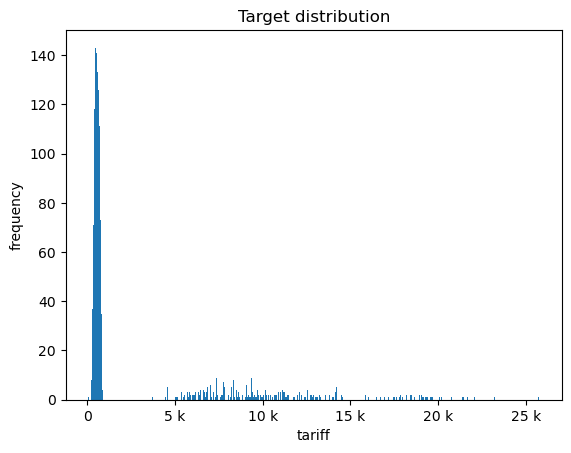

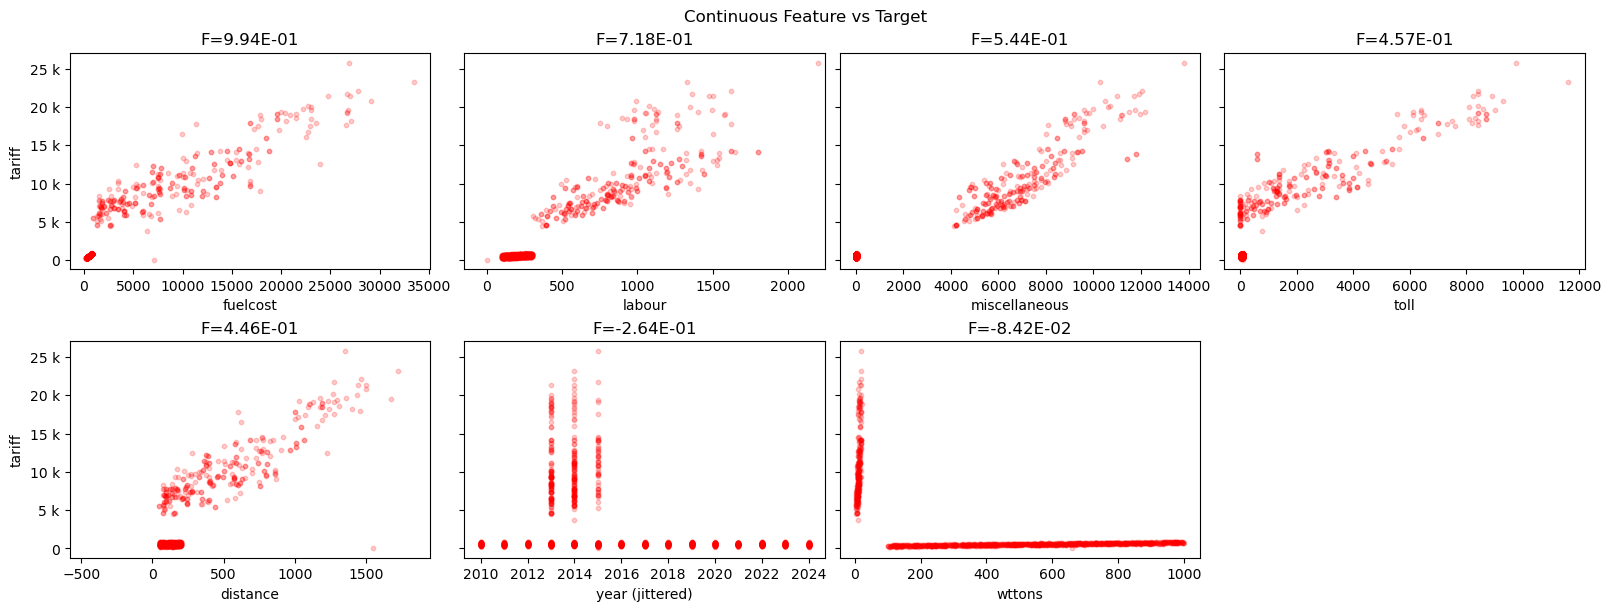

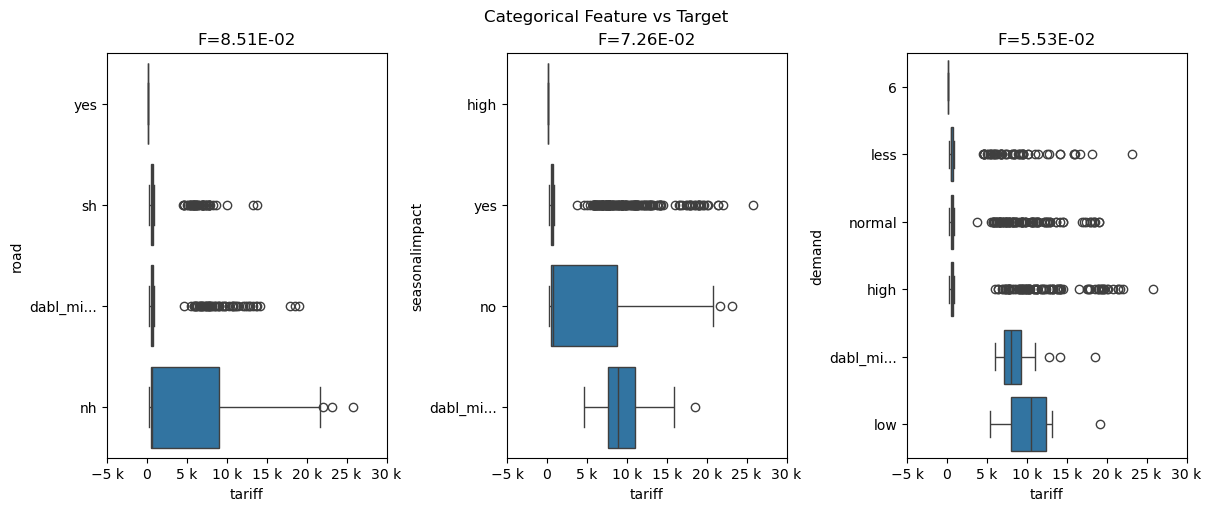

In [10]:
dabl.plot(df, target_col="tariff", color = 'red')


In [11]:
data = df


In [12]:
data.head()


year road seasonalimpact demand  wttons  labour  toll  distance  fuelcost  \
0  2013   nh            yes   high    10.0     750  8200    1460.0     23534   
1  2013   nh            yes   high    14.8    1110  8600    1360.0     22184   
2  2013   nh            yes   high    12.0     900  8300    1310.0     21476   
3  2013   nh            yes   high    10.0     750  2400     650.0     10473   
4  2013   nh            yes   high     8.0     600  3500     560.0      9417   

   miscellaneous   tariff  
0         9000.0  17950.0  
1        10000.0  19710.0  
2         9400.0  18600.0  
3         6000.0   9150.0  
4         5600.0   9700.0

In [13]:
data.tail()


year road seasonalimpact  demand  wttons  labour  toll  distance  \
1284  2019   nh             no  normal   861.0     285    99     184.0   
1285  2015   nh             no  normal   627.0     270    87     108.0   
1286  2024  NaN             no  normal   782.0     252    59      68.0   
1287  2022  NaN            yes    less   250.0     187    39      70.0   
1288  2018  NaN            yes  normal   246.0     242    28     164.0   

      fuelcost  miscellaneous  tariff  
1284       815           26.0   840.5  
1285       671           11.0   681.5  
1286       702           18.0   720.0  
1287       351           12.0   363.0  
1288       393           13.0   406.0

In [14]:
data.sample(3)


year road seasonalimpact  demand  wttons  labour  toll  distance  \
306   2024   sh             no  normal   362.0     259    54      72.0   
819   2022   sh            yes  normal   965.0     161    65     116.0   
1283  2016  NaN             no    high   487.0     228    63     185.0   

      fuelcost  miscellaneous  tariff  
306        494           10.0   504.0  
819        709           30.0   738.5  
1283       535           22.0   556.5

In [15]:
x = data.describe()
x.style.bar(color = ['silver', 'gold'], align = 'mid')


In [16]:
numeric_data = data.select_dtypes(include=['number'])
x = numeric_data.cov()
x.style.bar(color = ['silver', 'gold'], align = 'mid')


In [17]:
numeric_data = data.select_dtypes(include=['number'])
x = numeric_data.corr()
x.style.bar(color = ['silver', 'gold'], align = 'mid')

In [18]:
x = data.isnull().sum()
x = pd.DataFrame(x)
x.style.bar(color = ['lightgreen','lightcoral'], align = 'mid')

In [19]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [20]:
data.columns


Index(['year', 'road', 'seasonalimpact', 'demand', 'wttons', 'labour', 'toll',
       'distance', 'fuelcost', 'miscellaneous', 'tariff'],
      dtype='object')

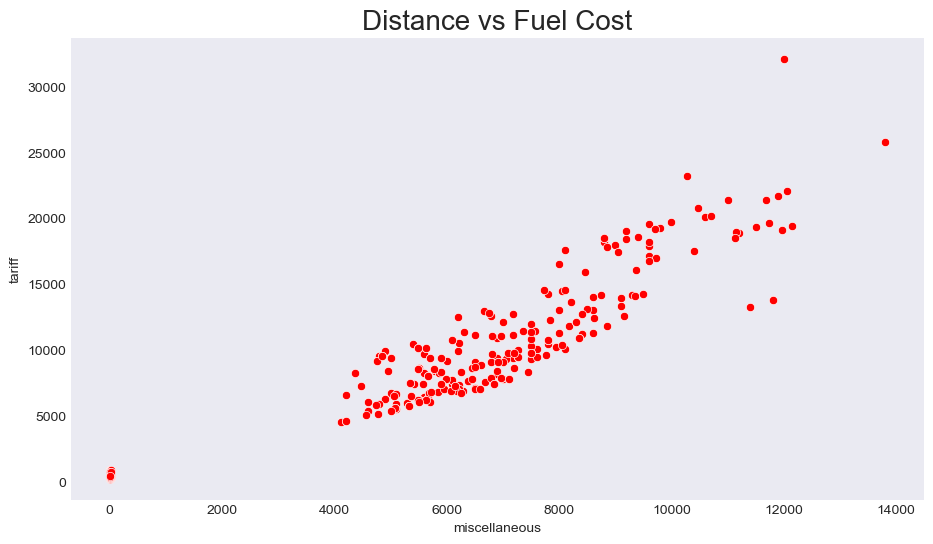

In [21]:
plt.rcParams['figure.figsize'] = (11, 6)
plt.style.use('seaborn-v0_8-dark')

sns.scatterplot(x=data['miscellaneous'],y=data['tariff'],  color = 'red')
plt.title('Distance vs Fuel Cost', fontsize = 20)
plt.show()
     

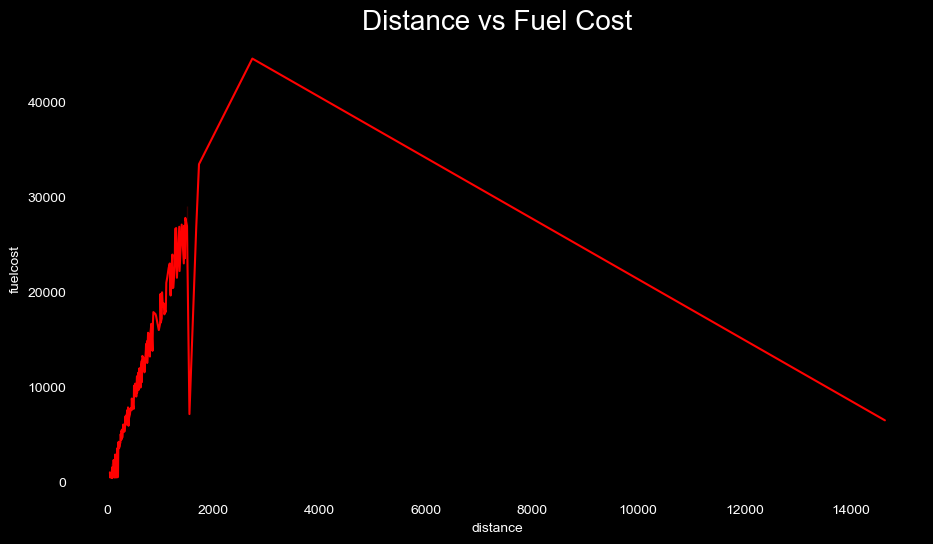

In [22]:
plt.rcParams['figure.figsize'] = (11, 6)
plt.style.use('dark_background')

sns.lineplot(x=data['distance'],y=data['fuelcost'],  color = 'red')
plt.title('Distance vs Fuel Cost', fontsize = 20)
plt.show()

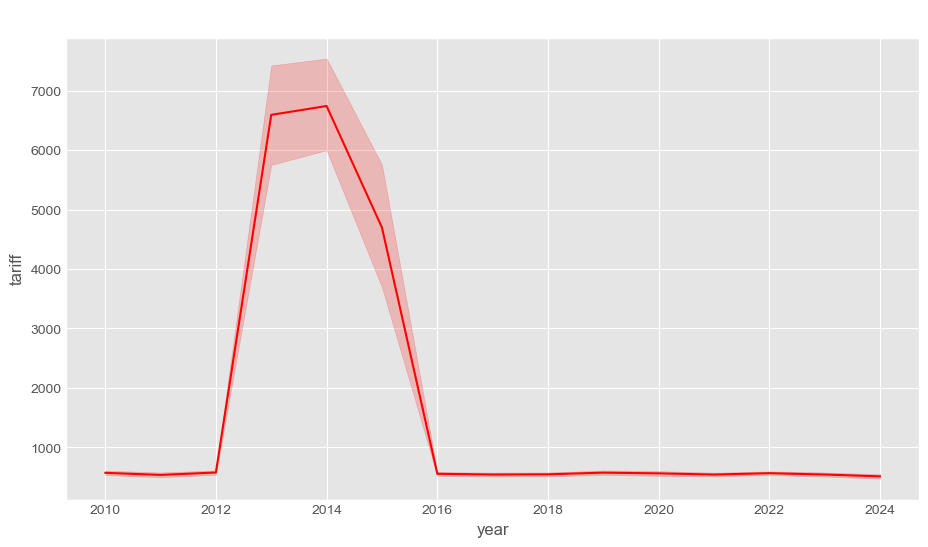

In [23]:
plt.rcParams['figure.figsize'] = (11, 6)
plt.style.use('ggplot')

sns.lineplot(x=data['year'],y=data['tariff'],  color = 'red')
plt.title('Tariff Rate Year wise Growth Trend', fontsize = 20)
plt.show()

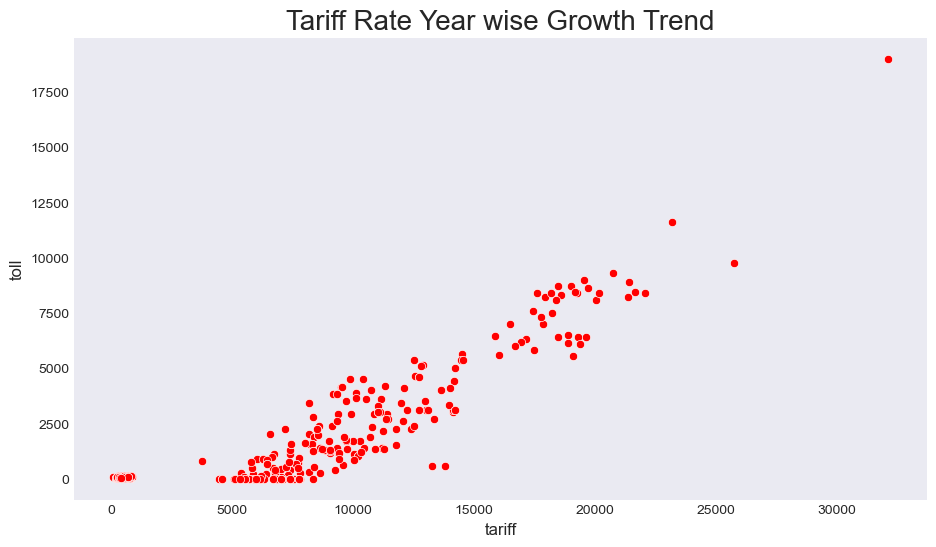

In [24]:
plt.rcParams['figure.figsize'] = (11, 6)
plt.style.use('seaborn-v0_8-dark')

sns.scatterplot(x=data['tariff'], y=data['toll'], color = 'red')
plt.title('Tariff Rate Year wise Growth Trend', fontsize = 20)
plt.show()

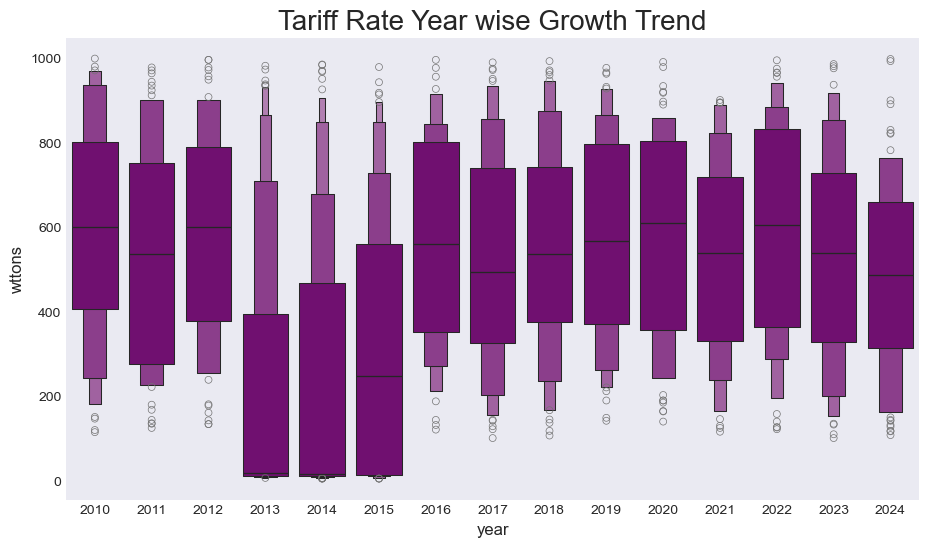

In [25]:
plt.rcParams['figure.figsize'] = (11, 6)
plt.style.use('seaborn-v0_8-dark')

sns.boxenplot(x=data['year'], y=data['wttons'], color = 'purple')
plt.title('Tariff Rate Year wise Growth Trend', fontsize = 20)
plt.show()

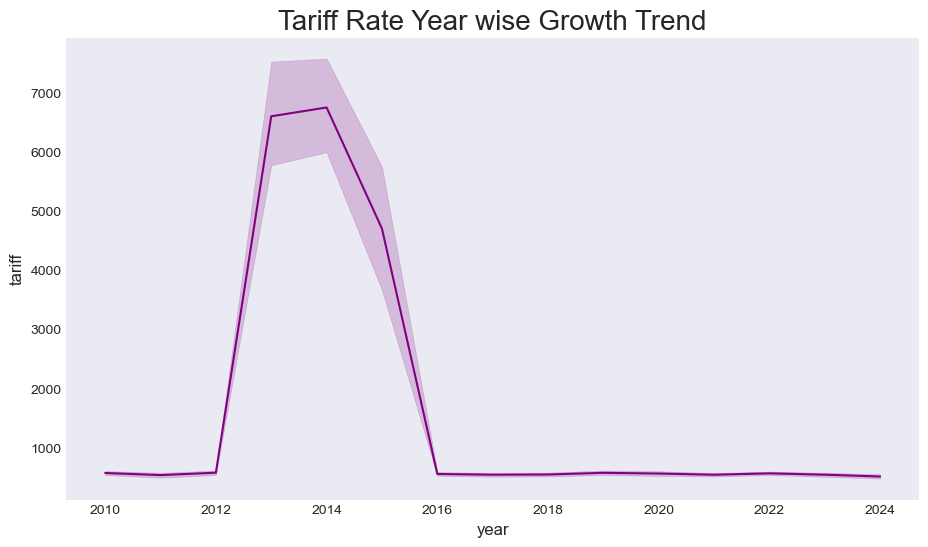

In [26]:
plt.rcParams['figure.figsize'] = (11, 6)
plt.style.use('seaborn-v0_8-dark')

sns.lineplot(x=data['year'], y=data['tariff'], color = 'purple')
plt.title('Tariff Rate Year wise Growth Trend', fontsize = 20)
plt.show()
     

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\4235682036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['demand'], palette = 'copper')


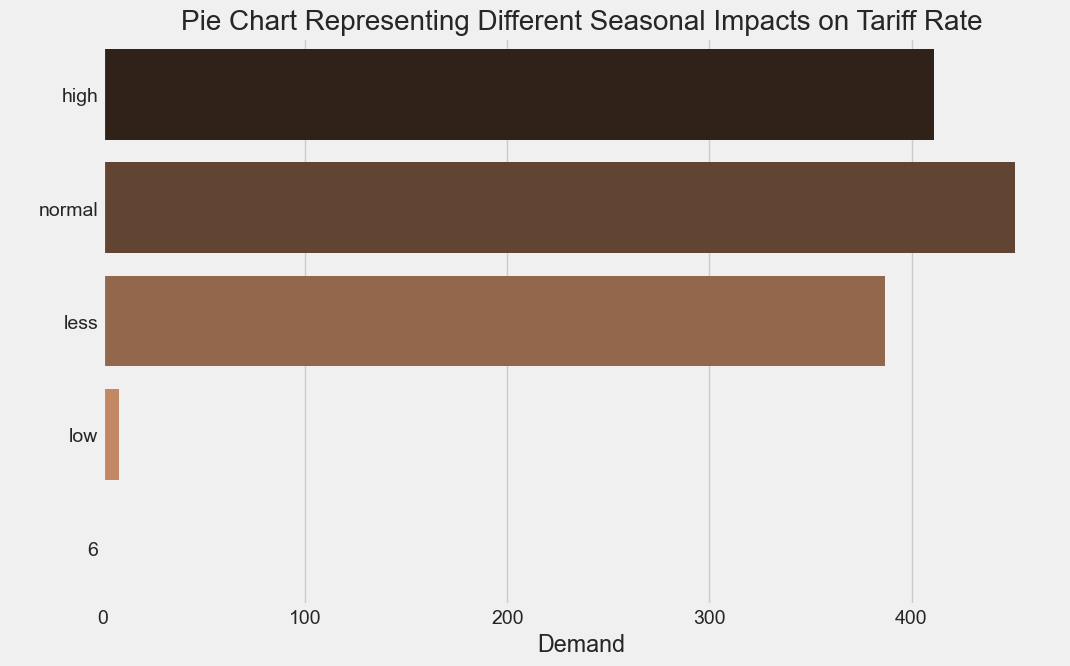

In [27]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 7)

sns.countplot(data['demand'], palette = 'copper')
plt.title('Pie Chart Representing Different Seasonal Impacts on Tariff Rate', fontsize = 20)
plt.xlabel('Demand')
plt.ylabel(' ')

plt.show()

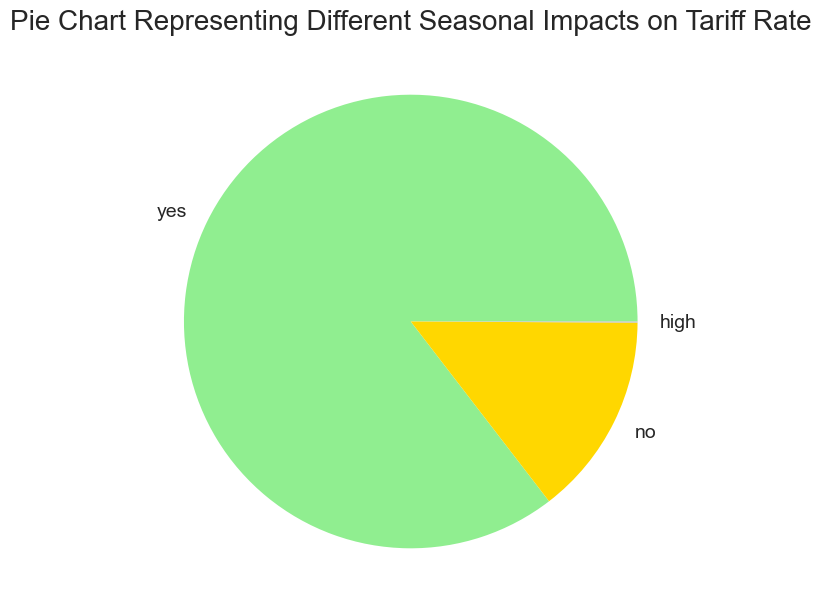

In [28]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (7, 7)

data['seasonalimpact'].value_counts().plot(kind = 'pie',
                                          colors = ['lightgreen','gold','silver'])
plt.title('Pie Chart Representing Different Seasonal Impacts on Tariff Rate', fontsize = 20)
plt.axis('off')
plt.show()

In [29]:
@interact
def check_correlation(column1 = list(data.select_dtypes('number').columns),
                      column2 = list(data.select_dtypes('number').columns[1:])):
    print(f"The Correlation is :", {data[column1].corr(data[column2])})

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [30]:
!pip install ipywidgets


In [31]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [32]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [33]:
!pip install jupyter_contrib_nbextensions

In [34]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [35]:
@interact
def check_correlation(column1 = list(data.select_dtypes('number').columns),
                      column2 = list(data.select_dtypes('number').columns[1:])):
    print(f"The Correlation is :", {data[column1].corr(data[column2])})

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [36]:
@interact
def check_covariance(column1 = list(data.select_dtypes('number').columns),
                      column2 = list(data.select_dtypes('number').columns[1:])):
    print(f"The Covariance is :", {data[column1].cov(data[column2])})

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [37]:

@interact
def check_maximum(column1 = list(data.select_dtypes('number').columns)):
    print(f"The Maximum Value is :", {data[column1].max()})

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [38]:
@interact
def check_minimum(column1 = list(data.select_dtypes('number').columns)):
    print(f"The Minimum Value is :", {data[column1].min()})

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [39]:
@interact
def check_deviation(column1 = list(data.select_dtypes('number').columns)):
    print(f"The Standard Deviation is :", {data[column1].std()})

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [40]:
plt.rcParams['figure.figsize'] = (11, 7)

In [41]:
plt.style.use('dark_background')

@interact_manual
def scatter_plot(column1 = list(data.select_dtypes('number').columns),
                column2 = list(data.select_dtypes('number').columns[1:])):
    data.plot(kind = 'scatter',
              color = 'white',
              x = column1,
              y = column2)

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [42]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [43]:
plt.style.use('ggplot')

@interact_manual
def scatter_plot(column1 = list(data.select_dtypes('number').columns),
                column2 = list(data.select_dtypes('number').columns[1:]),
                kind = ['scatter','line']):
    data.plot(kind = kind,
              color = 'black',
              x = column1,
              y = column2)

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [44]:
@interact_manual
def scatter_plot(column1 = list(data.select_dtypes('number').columns),
                column2 = list(data.select_dtypes('number').columns[1:]),
                kind = ['scatter','line'],
                color = ['black','red','green','yellow','pink']):
    data.plot(kind = kind,
              color = color,
              x = column1,
              y = column2)

interactive(children=(Dropdown(description='column1', options=('year', 'wttons', 'labour', 'toll', 'distance',…

In [45]:
@interact_manual
def scatter_plot(column1 = list(data.select_dtypes('object').columns),
                column2 = list(data.select_dtypes('number').columns[1:]),
                 palette = ['copper','spring','summer','Reds','Greens','Blues']):
    sns.boxenplot(
              data[column1],
              data[column2],
              palette = palette)

interactive(children=(Dropdown(description='column1', options=('road', 'seasonalimpact', 'demand'), value='roa…

In [46]:
data.columns

Index(['year', 'road', 'seasonalimpact', 'demand', 'wttons', 'labour', 'toll',
       'distance', 'fuelcost', 'miscellaneous', 'tariff'],
      dtype='object')

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\2311644828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tariff'],


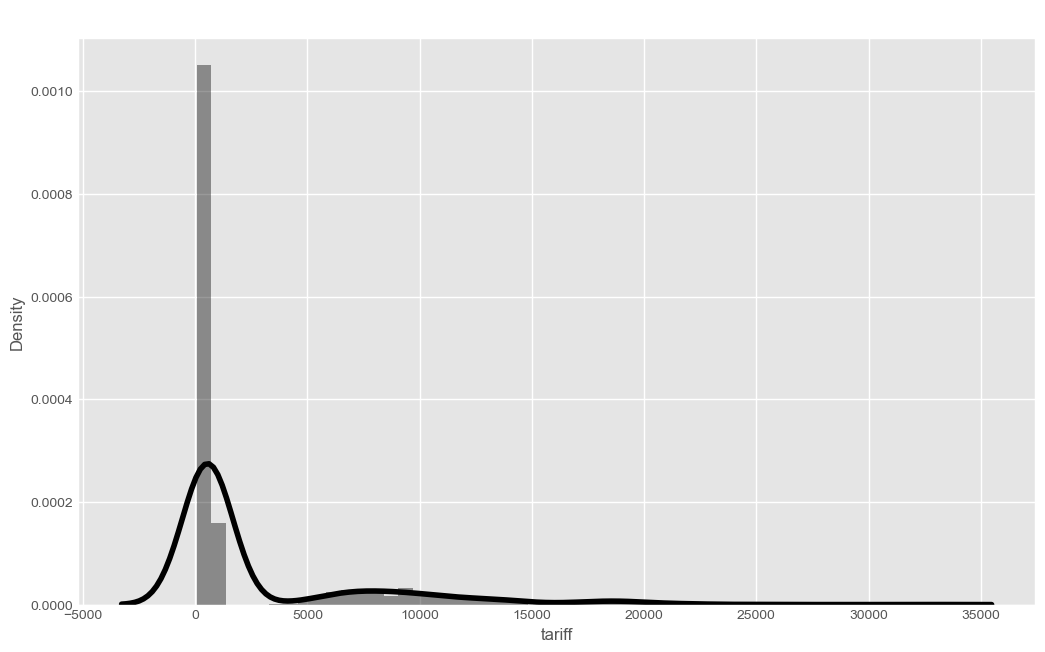

In [47]:
sns.distplot(data['tariff'],
             color = 'black')
plt.title('Distribution of Tariff Rates', fontsize = 20)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\4246269953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fuelcost'],


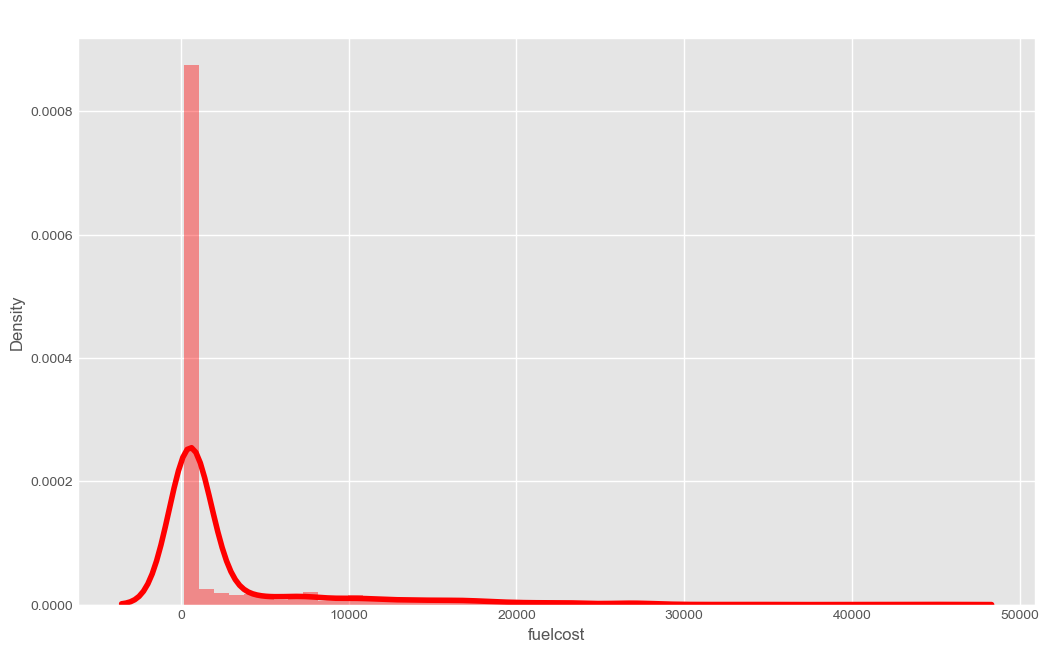

In [48]:
sns.distplot(data['fuelcost'],
             color = 'red')
plt.title('Distribution of Fuel Cost', fontsize = 20)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\1496876724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['distance'],


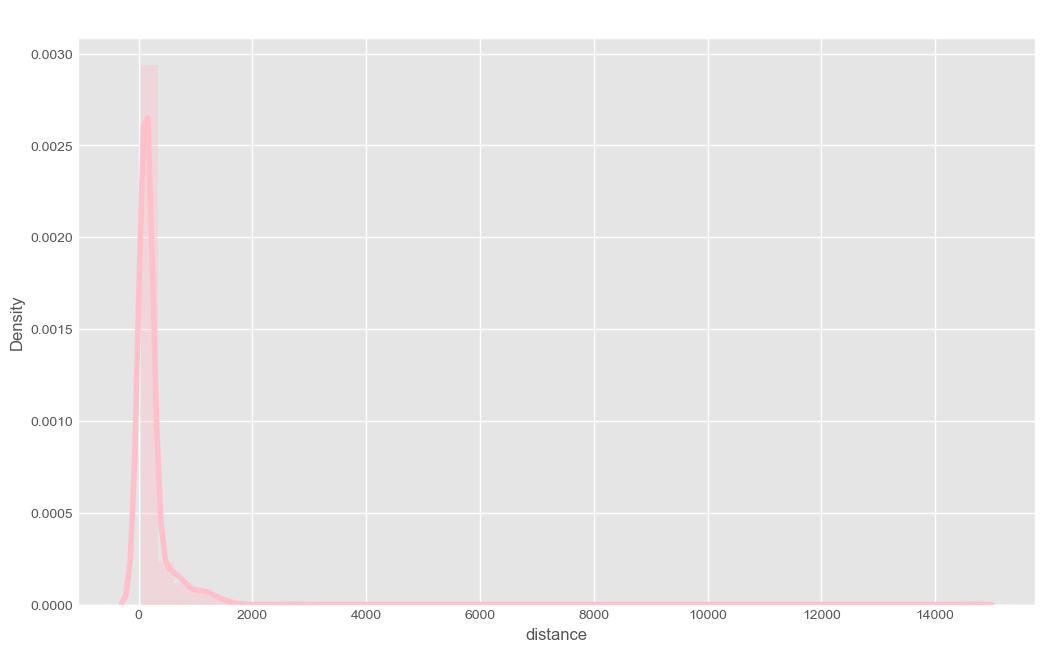

In [49]:
sns.distplot(data['distance'],
             color = 'pink')
plt.title('Distribution of Distances Travelled', fontsize = 20)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\3998863826.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['toll'],


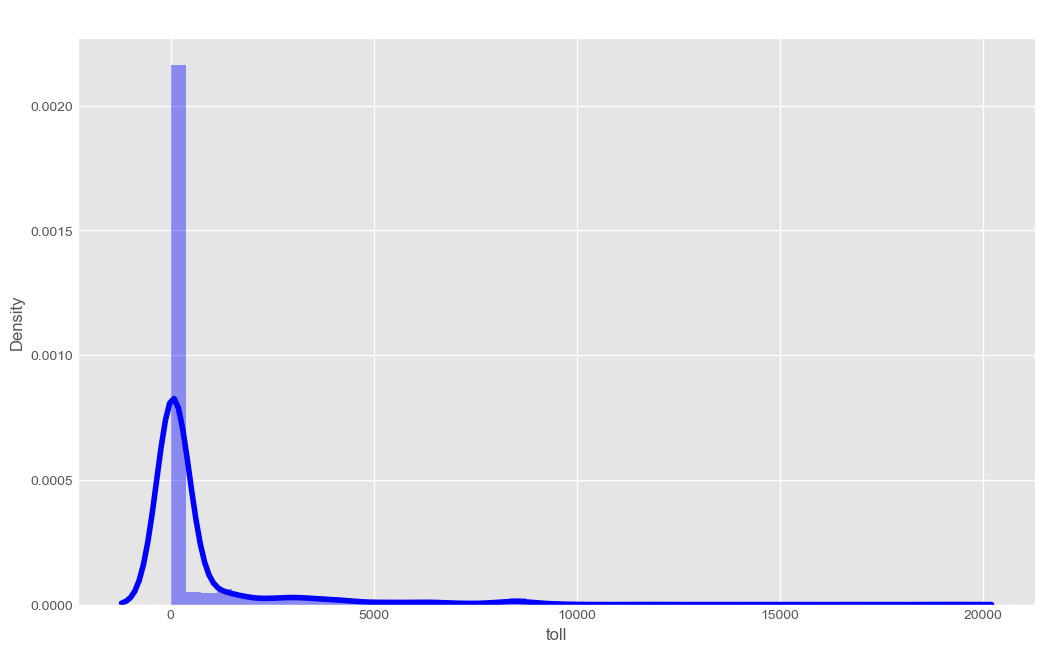

In [50]:
sns.distplot(data['toll'],
             color = 'blue')
plt.title('Distribution of Toll Charges', fontsize = 20)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\2211910622.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['labour'],


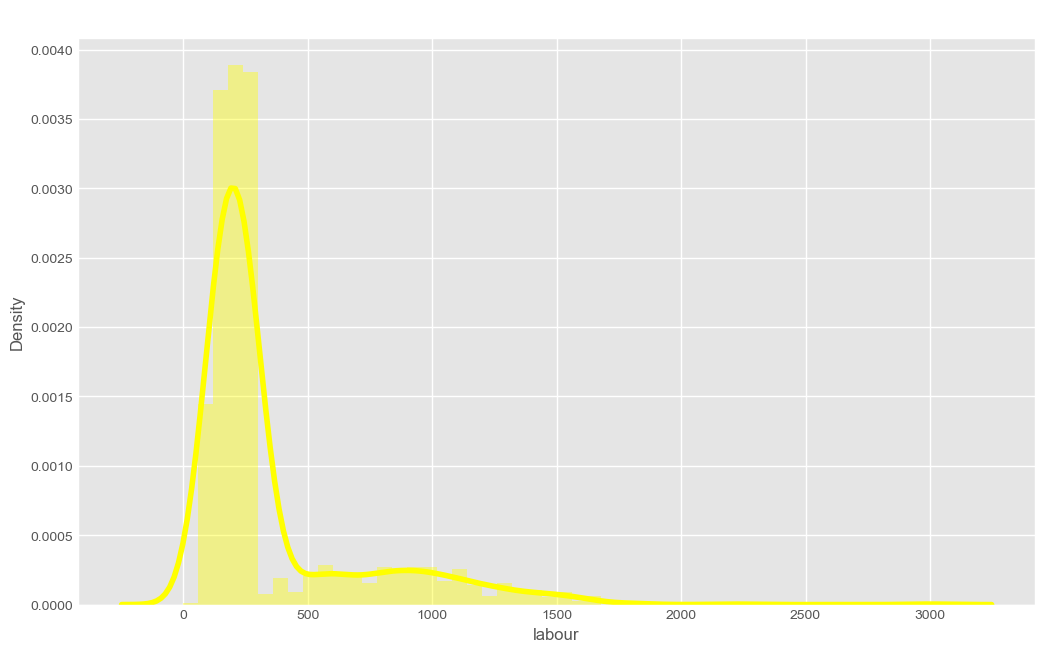

In [51]:
sns.distplot(data['labour'],
             color = 'yellow')
plt.title('Distribution of Labor Charges', fontsize = 20)
plt.show()

In [52]:
d1 = pd.crosstab(data['year'], data['seasonalimpact'],)
d1


seasonalimpact  high  no  yes
year                         
2010               0   4   61
2011               0   7   45
2012               0   5   50
2013               0  34  138
2014               0  48  118
2015               1  20  109
2016               0   8   57
2017               0   7   69
2018               0   7   59
2019               0   5   62
2020               0   7   50
2021               0   5   60
2022               0   8   72
2023               0   8   57
2024               0   7   55

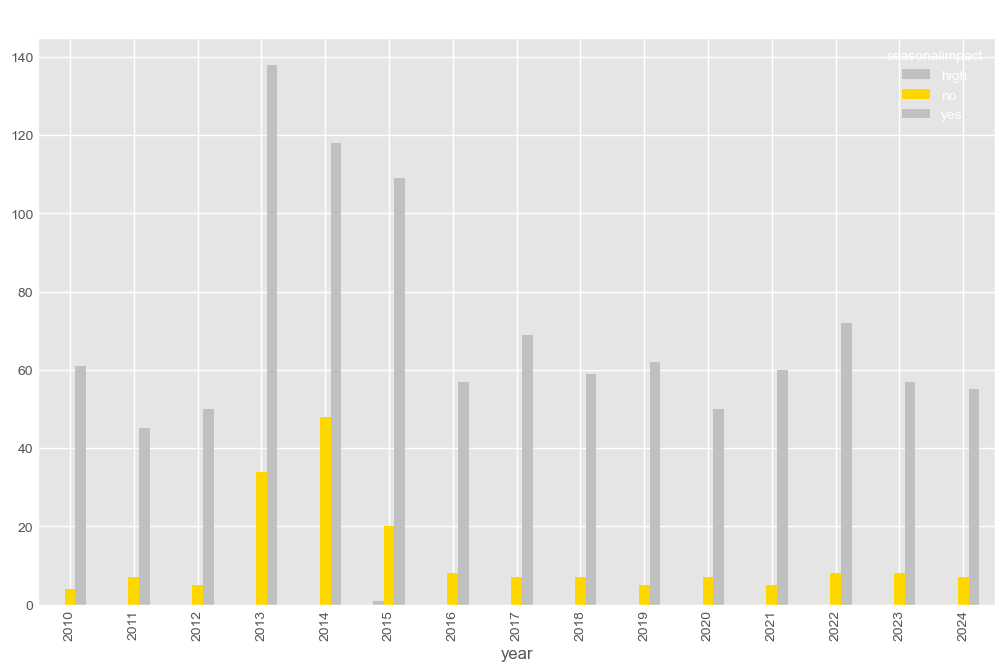

In [53]:
d1.plot(kind = 'bar',
        stacked = False,
        color = ['silver', 'gold'])
plt.title('Seasonal Impact each Year', fontsize = 20)
plt.show()

In [54]:
d2 = pd.crosstab(data['year'], data['demand'],)
d2


demand  6  high  less  low  normal
year                              
2010    0    21    21    0      23
2011    0    23    15    0      14
2012    0    12    24    0      19
2013    0    56    53    0      74
2014    0    68    47    0      59
2015    1    44    24    8      49
2016    0    25    14    0      26
2017    0    25    23    0      28
2018    0    14    29    0      23
2019    0    21    25    0      21
2020    0    16    21    0      20
2021    0    24    17    0      24
2022    0    30    25    0      25
2023    0    15    31    0      19
2024    0    17    18    0      27

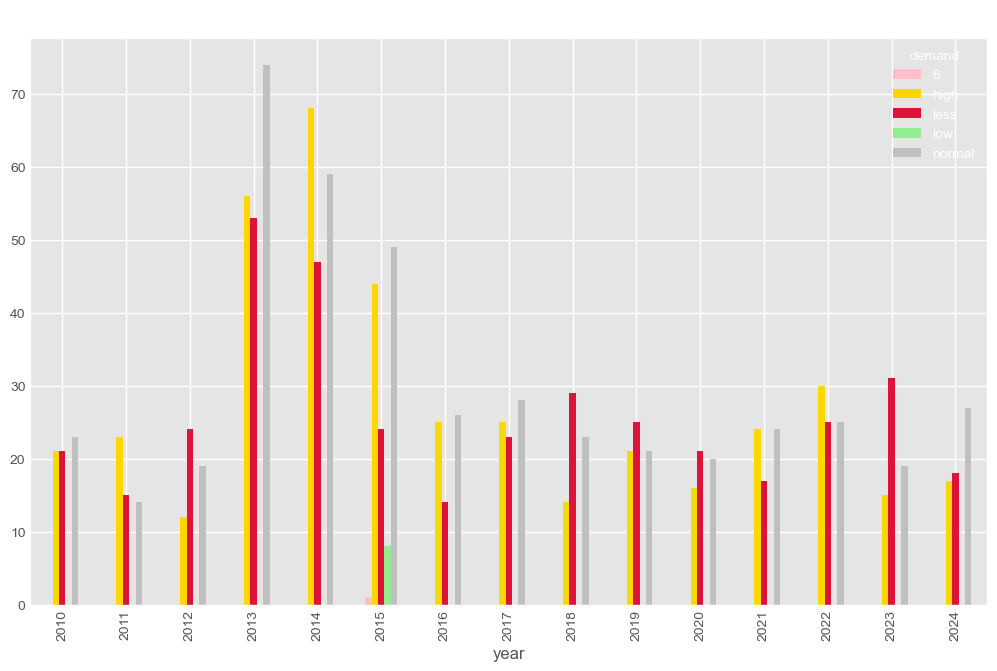

In [55]:
d2.plot(kind = 'bar',
        color = ['pink', 'gold','crimson','lightgreen','silver'],)
plt.title('Demand each year', fontsize = 20)
plt.show()

In [56]:
data_numeric = data.select_dtypes(include=[np.number])

In [57]:
correlation_matrix = data_numeric.corr()

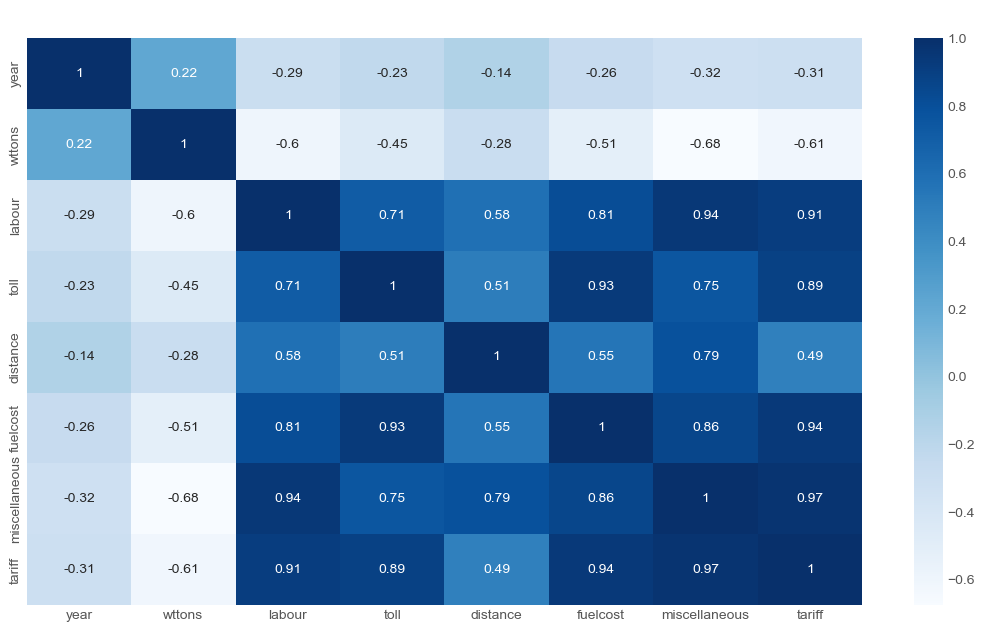

In [58]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)
plt.title('Heatmap for Correlation', fontsize=20)
plt.show()

In [59]:
data_numeric = data.select_dtypes(include=[np.number])

In [60]:
covariance_matrix = data_numeric.cov()


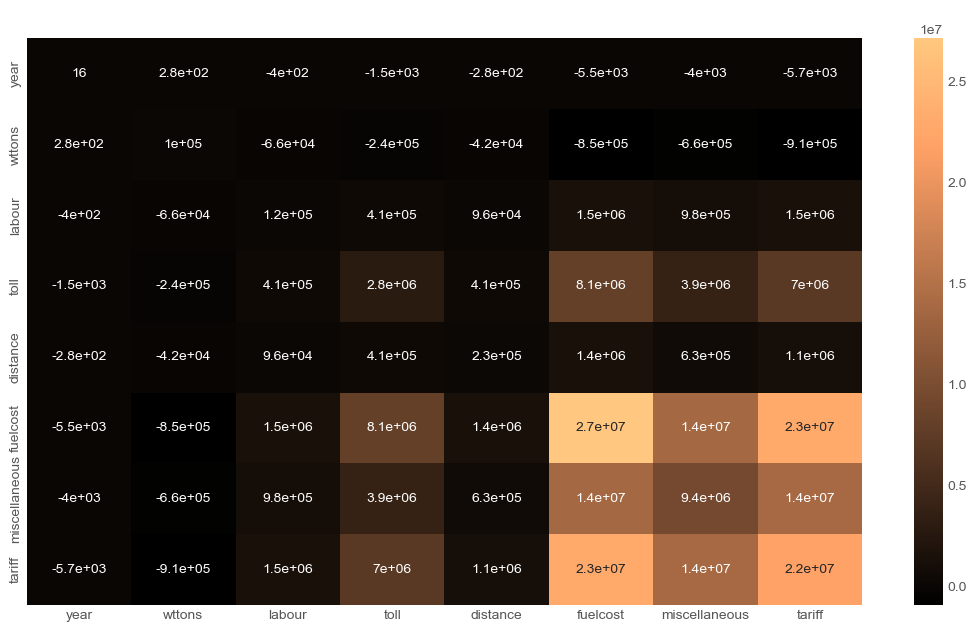

In [61]:
sns.heatmap(data_numeric.cov(),
            cmap = 'copper',
            annot = True)
plt.title('Covariance of the Data', fontsize = 20)
plt.show()

In [62]:
data['wttons'].mean()


428.82270186335404

In [63]:
data['wttons'] = data['wttons'].fillna(data['wttons'].mean())
print("Medain Value of wttons: ", data['wttons'].median())
print("Mean Value of wttons: ", data['wttons'].mean())

Medain Value of wttons:  423.0
Mean Value of wttons:  428.82270186335404


In [64]:
data['demand'].value_counts()

demand
normal    451
high      411
less      387
low         8
6           1
Name: count, dtype: int64

In [65]:
data['demand'] = data['demand'].fillna(data['demand'].mode()[0])
data['demand'].value_counts()

demand
normal    482
high      411
less      387
low         8
6           1
Name: count, dtype: int64

In [66]:
data['seasonalimpact'].value_counts()

seasonalimpact
yes     1062
no       180
high       1
Name: count, dtype: int64

In [67]:
data['seasonalimpact'] = data['seasonalimpact'].fillna(data['seasonalimpact'].mode()[0])
data['seasonalimpact'].value_counts()

seasonalimpact
yes     1108
no       180
high       1
Name: count, dtype: int64

In [68]:
data['road'].value_counts()

road
nh     525
sh     381
yes      1
Name: count, dtype: int64

In [69]:
data['road'] = data['road'].fillna(data['road'].mode()[0])
data['road'].value_counts()

road
nh     907
sh     381
yes      1
Name: count, dtype: int64

In [70]:
data['distance'].median()

141.0

In [71]:
data['distance'] = data['distance'].fillna(data['distance'].median())

In [72]:
data['miscellaneous'].median()

21.0

In [73]:
data['miscellaneous'] = data['miscellaneous'].fillna(data['miscellaneous'].median())

In [74]:
data.isnull().sum()

year              0
road              0
seasonalimpact    0
demand            0
wttons            0
labour            0
toll              0
distance          0
fuelcost          0
miscellaneous     0
tariff            0
dtype: int64

In [75]:
data.isnull().sum().sum()

0

In [76]:
x = data.dtypes =='object'
x = x[x == True]
x.index

Index(['road', 'seasonalimpact', 'demand'], dtype='object')

In [77]:
data['demand'].value_counts()


demand
normal    482
high      411
less      387
low         8
6           1
Name: count, dtype: int64

In [78]:
data[['demand', 'tariff']].groupby(['demand']).agg('median')

tariff
demand          
6          77.00
high      629.00
less      564.00
low     10516.00
normal    629.25

In [79]:
data['demand'] = data['demand'].replace(6, -1)
data['demand'] = data['demand'].replace('high', 2)
data['demand'] = data['demand'].replace('low', 2)
data['demand'] = data['demand'].replace('normal', 1)
data['demand'] = data['demand'].replace('less', 1)

In [80]:
data['seasonalimpact'].value_counts()

seasonalimpact
yes     1108
no       180
high       1
Name: count, dtype: int64

In [81]:
data[['seasonalimpact', 'tariff']].groupby(['seasonalimpact']).agg('median')

tariff
seasonalimpact        
high             77.00
no              740.25
yes             597.00

In [82]:
data[['seasonalimpact', 'tariff']].groupby(['seasonalimpact']).agg('std')

tariff
seasonalimpact             
high                    NaN
no              5841.653086
yes             4380.306102

In [83]:
data['seasonalimpact'] = data['seasonalimpact'].replace('yes', 1)
data['seasonalimpact'] = data['seasonalimpact'].replace('no', 1)
data['seasonalimpact'] = data['seasonalimpact'].replace('high', 0)

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\1319675841.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['seasonalimpact'] = data['seasonalimpact'].replace('high', 0)


In [84]:
data['road'].value_counts()


road
nh     907
sh     381
yes      1
Name: count, dtype: int64

In [85]:
data[['road', 'tariff']].groupby(['road']).agg('median')

tariff
road        
nh     629.0
sh     575.5
yes     77.0

In [86]:
data['road'] = data['road'].replace('nh', 2)
data['road'] = data['road'].replace('sh', 1)
data['road'] = data['road'].replace('yes', 0)

C:\Users\sneha\AppData\Local\Temp\ipykernel_28876\1828357462.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['road'] = data['road'].replace('yes', 0)


In [87]:
data['road'].value_counts()

road
2    907
1    381
0      1
Name: count, dtype: int64

In [88]:
data.dtypes

year                int64
road                int64
seasonalimpact      int64
demand             object
wttons            float64
labour              int64
toll                int64
distance          float64
fuelcost            int64
miscellaneous     float64
tariff            float64
dtype: object

In [89]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# lets check the shape of x and y
print("shape of x :", x.shape)
print("Shape of y :", y.shape)

shape of x : (1289, 10)
Shape of y : (1289,)


In [90]:
x.head()

year  road  seasonalimpact demand  wttons  labour  toll  distance  \
0  2013     2               1      2    10.0     750  8200    1460.0   
1  2013     2               1      2    14.8    1110  8600    1360.0   
2  2013     2               1      2    12.0     900  8300    1310.0   
3  2013     2               1      2    10.0     750  2400     650.0   
4  2013     2               1      2     8.0     600  3500     560.0   

   fuelcost  miscellaneous  
0     23534         9000.0  
1     22184        10000.0  
2     21476         9400.0  
3     10473         6000.0  
4      9417         5600.0

In [91]:
y.head()


0    17950.0
1    19710.0
2    18600.0
3     9150.0
4     9700.0
Name: tariff, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

# lets check the shape of the training nad testing sets of dependent and independent variables
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (1031, 10)
Shape of x_test : (258, 10)
Shape of y_train : (1031,)
Shape of y_test : (258,)


In [93]:
x_train.head()


year  road  seasonalimpact demand  wttons  labour  toll  distance  \
814  2015     2               1      1   235.0     240    28      75.0   
711  2014     2               1      2   574.0     143    40     153.0   
481  2021     2               1      2   895.0     101    99      60.0   
386  2024     1               1      1   168.0     150    40     138.0   
557  2019     2               1      1   912.0     181    22     114.0   

     fuelcost  miscellaneous  
814       386            6.0  
711       470            6.0  
481       648           24.0  
386       274           10.0  
557       659           22.0

In [94]:
x_train.style.bar(color = ['red','green'], align = 'zero')


In [95]:
x_test.head()


year  road  seasonalimpact demand  wttons  labour  toll  distance  \
898  2014     1               1      1   356.0     262    98     112.0   
472  2019     2               1      1   148.0     184    56     158.0   
328  2012     2               1      1   721.0     157    81      89.0   
240  2015     2               1      2    15.0    1650  3120     777.0   
349  2013     2               1      1   973.0     148    70     160.0   

     fuelcost  miscellaneous  
898       538           25.0  
472       314            7.0  
328       599           10.0  
240     15414         9350.0  
349       705           13.0

In [96]:
y_train.head()


814    391.5
711    476.0
481    671.5
386    284.0
557    681.0
Name: tariff, dtype: float64

In [97]:
y_test.head()


898      563.0
472      321.0
328      608.5
240    14120.0
349      717.5
Name: tariff, dtype: float64

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# lets check the shape of sets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)

Shape of x_train : (1031, 10)
Shape of x_test : (258, 10)


In [99]:
x_train_viz = pd.DataFrame(x_train)
x_train_viz.style.bar(color = ['red','green'], align = 'mid')

In [100]:
x_test_viz = pd.DataFrame(x_test)
x_test_viz.style.bar(color = ['red','green'], align = 'mid')


In [101]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9809581494863174


In [102]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(error)
print(rmse)

631.6010318010041


In [103]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.9809581494863174


In [104]:
print("Mean of the Predictions :", y_pred.mean())
print("Maxima of the Predictions :",y_pred.max())
print("Minima of the Predictions :",y_pred.min())
print("Standard Deviation of the Predictions :", y_pred.std())

pred = pd.DataFrame(y_pred)
print("Median of the Predictions :",pred.median())

Mean of the Predictions : 2590.5678294573645
Maxima of the Predictions : 32125.0
Minima of the Predictions : 225.0
Standard Deviation of the Predictions : 4752.134740035622
Median of the Predictions : 0    582.0
dtype: float64


In [105]:
pred.style.bar(color = 'orange', align = 'mid')

In [106]:
df.head()


year  road  seasonalimpact demand  wttons  labour  toll  distance  \
0  2013     2               1      2    10.0     750  8200    1460.0   
1  2013     2               1      2    14.8    1110  8600    1360.0   
2  2013     2               1      2    12.0     900  8300    1310.0   
3  2013     2               1      2    10.0     750  2400     650.0   
4  2013     2               1      2     8.0     600  3500     560.0   

   fuelcost  miscellaneous   tariff  
0     23534         9000.0  17950.0  
1     22184        10000.0  19710.0  
2     21476         9400.0  18600.0  
3     10473         6000.0   9150.0  
4      9417         5600.0   9700.0

In [107]:
prediction = model.predict(sc.transform(np.array([[2025, 1, 2, 1, 15.0, 1110, 7200, 1500.0, 25000, 12000.0]])))


c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [108]:
prediction

array([20050.])

In [109]:
import eli5
from eli5.sklearn import PermutationImportance

In [110]:
!pip install eli5

In [111]:
import eli5
from eli5.sklearn import PermutationImportance

In [112]:
pip install scikit-learn==0.24.2

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "c:\Users\sneha\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\sneha\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\sneha\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
          return hook(metadata_director

In [113]:
perm = PermutationImportance(model, random_state = 0)
perm.fit(x_test, y_test)
features = data.columns[:-1].tolist()
plt.rcParams['figure.figsize'] = (10, 15)
eli5.show_weights(perm, feature_names = features)

In [114]:
prediction = model.predict(sc.transform(np.array([[2026, 2, 1, 2, 10.0, 750, 7200, 1500.0, 25000, 15000.0]])))
prediction

c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([20050.])